In [9]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

%precision 3

np.random.seed(0)

# 確率


In [10]:
dice_data = np.array([1, 2, 3, 4, 5, 6])

# 試行
print(np.random.choice(dice_data, 1))

[5]


- **根元事象（基本事象）**: 1 つずつの試行結果のこと（e.g. [5], [1]）

- **標本空間** S: すべての可能な根元事象を集めた集合

  - S = {1, 2, 3, 4, 5, 6}

- **事象**: 標本空間の任意の部分集合
  - X = {5}
  - Y = {2, 4, 6}


In [11]:
calc_steps = 1000
dice_rolls = np.random.choice(dice_data, calc_steps)
dice_rolls

array([6, 1, 4, 4, 4, 2, 4, 6, 3, 5, 1, 1, 5, 3, 2, 1, 2, 6, 2, 6, 1, 2,
       5, 4, 1, 4, 6, 1, 3, 4, 1, 2, 4, 6, 4, 4, 1, 2, 2, 2, 1, 3, 5, 4,
       4, 3, 5, 3, 1, 1, 5, 6, 6, 1, 5, 2, 5, 2, 3, 3, 1, 2, 2, 2, 2, 4,
       4, 3, 4, 1, 4, 6, 5, 2, 3, 5, 4, 5, 5, 5, 4, 5, 5, 5, 1, 5, 4, 3,
       6, 6, 6, 1, 2, 6, 2, 4, 1, 6, 1, 2, 3, 5, 3, 1, 6, 4, 3, 3, 6, 1,
       6, 2, 1, 3, 3, 4, 3, 4, 3, 2, 3, 4, 4, 4, 3, 4, 5, 2, 3, 4, 2, 3,
       2, 5, 3, 4, 1, 4, 3, 4, 1, 1, 1, 4, 3, 4, 1, 5, 1, 6, 1, 6, 3, 4,
       3, 4, 6, 1, 1, 1, 4, 1, 3, 3, 1, 5, 4, 5, 6, 1, 5, 4, 6, 4, 5, 6,
       2, 6, 4, 1, 1, 1, 6, 6, 2, 1, 5, 2, 6, 6, 4, 2, 1, 1, 5, 4, 4, 2,
       6, 6, 1, 1, 2, 3, 1, 4, 6, 2, 2, 5, 1, 6, 1, 4, 3, 4, 3, 5, 4, 6,
       6, 4, 1, 4, 1, 5, 3, 4, 6, 6, 5, 1, 3, 4, 4, 2, 6, 4, 5, 6, 6, 4,
       4, 2, 2, 2, 4, 3, 3, 5, 4, 2, 3, 4, 6, 6, 6, 2, 5, 3, 3, 1, 2, 6,
       1, 5, 1, 4, 3, 6, 6, 1, 1, 6, 2, 2, 1, 4, 1, 4, 1, 5, 5, 1, 2, 4,
       5, 4, 3, 6, 2, 2, 3, 2, 6, 5, 6, 3, 6, 6, 5,

In [16]:
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls == i]) / calc_steps
    print(f"P({i}) = {p}")

P(1) = 0.171
P(2) = 0.158
P(3) = 0.157
P(4) = 0.183
P(5) = 0.16
P(6) = 0.171


P(i) ≈ 0.166 = 1/6（**統計的確率**という）


**条件付き確率**: P(B|A) = P(A∩B) / P(A)  
**乗法定理**: P(A∩B) = P(B|A) \* P(A)


**独立**:  
P(B|A) = P(B)  
P(A∩B) = P(A) \* P(B)


**ベイズの定理**: A という結果がわかっているときに、その原因が B 事象である確率を求める i.e. P(原因|結果)  
P(B|A) = P(A|B) _ P(B) / (P(A|B) _ P(B) + P(A|B<sup>c</sup>) \* P(B<sup>c</sup>))

- P(B)...**事前確率**（事象 A が起きる前の事象 B の確率）
- P(B|A)...**事後確率**（事象 A が起きた後の事象 B の確率）

- P(A|B)...**尤度**（事象 B が起きた場合に事象 A が起こるであろう確率）


In [20]:
# p102
np.random.seed(0)
coin_data = np.array([0, 1])
tosses = np.random.choice(coin_data, 1000)
print(f"P(表): {len(tosses[tosses==0]) / 1000}")
print(f"P(裏): {len(tosses[tosses==1]) / 1000}")

P(表): 0.496
P(裏): 0.504


In [46]:
# X: 1回目があたり
# Y: 2回目があたり
# P(X∩Y) = P(Y|X) * P(X) = 99/999 + 100/1000 = 0.0099

# モンテカルロ的アプローチで解いてみる
np.random.seed(0)
kuji = np.concatenate((np.zeros(900, dtype="int"), np.ones(100, dtype="int")))
np.random.shuffle(kuji)

cnt = 0
for _ in range(1_000_000):
    pulls = np.random.choice(kuji, 2, replace=False)
    if np.all(pulls == 1):
        cnt += 1

print(f"2回連続あたりの確率: {cnt / 1_000_000}")

2回連続あたりの確率: 0.009936


In [41]:
# P(病気|陽性) = P(陽性|病気) * P(病気) / (P(陽性|病気) * P(病気) + P(陽性|病気^c) * P(病気^c))
p = 0.99 * 0.1 / (0.99 * 0.1 + 0.03 * 99.9)
p

0.032

# 確率変数と確率分布


**確率変数** X の **実現値** x (e.g. 1, 2, 3, 4, 5, 6) に対して、確率 P(X=x) を求めることができる


- **分布関数**（累積確率分布関数）: 確率変数 X が実数 x 以下になる確率
  - 離散確率変数の場合、分布関数 F(x) = P(X≤x) = Σ<sub>i: x<sub>i</sub>≤x</sub> P(X=x<sub>i</sub>)
  - 連続確率変数の場合、分布関数 F(x) = P(X≤x) = ∫<sub>-∞</sub><sup>x</sup> f(t) dt
    （ただし、f(t) は**確率密度関数**）


- **期待値**: E(X) = Σ<sub>i</sub> x<sub>i</sub> \* P(X=x<sub>i</sub>)
  - 確率変数 X が取り得る色々な実現値 x を代表した平均のことであり、平均と同じ意味


## 実データからその分布をグラフにする


### 一様分布

すべての事象が起こる確率が等しい


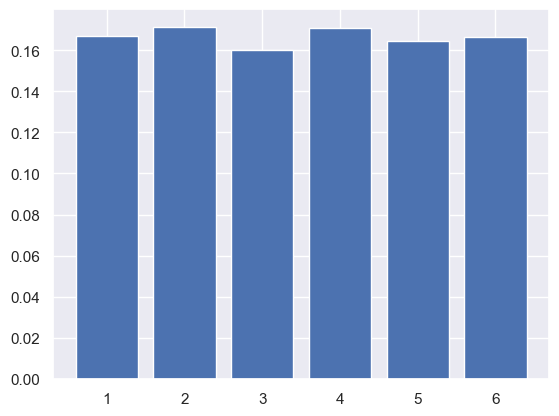

In [58]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

dice = np.arange(1, 7)
times = 10000
rolls = np.random.choice(dice, times)

prob = np.array([])
for i in range(1, 7):
    p = sum(rolls == i) / times
    prob = np.append(prob, p)

plt.bar(dice, prob)
plt.grid(True)

### ベルヌーイ分布

結果が 2 種類しかない試行をベルヌーイ試行という。ベルヌーイ分布とは、**1 回**のベルムーイ試行において、各事象が生じる確率の分布を指す。


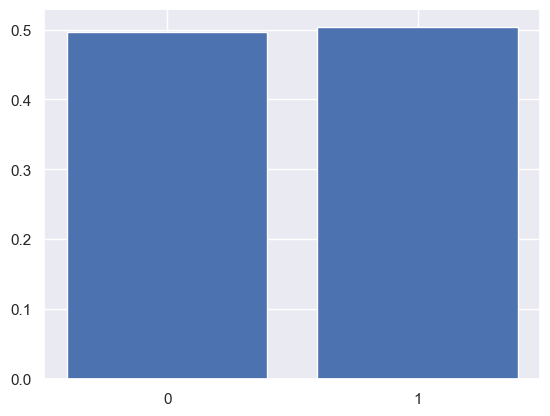

In [61]:
np.random.seed(0)

coin = np.array([0, 1])
times = 1000
tosses = np.random.choice(coin, times)

prob = np.array([])
for i in [0, 1]:
    p = sum(tosses == i) / times
    prob = np.append(prob, p)

plt.bar(coin, prob)
plt.xticks([0, 1])
plt.grid(True)

## Python で分布に基づくデータを取得する


### 二項分布

結果が 2 種類しかない試行をベルヌーイ試行という。二項分布とは、独立なベルヌーイ試行を**n 回**繰り返したもの。


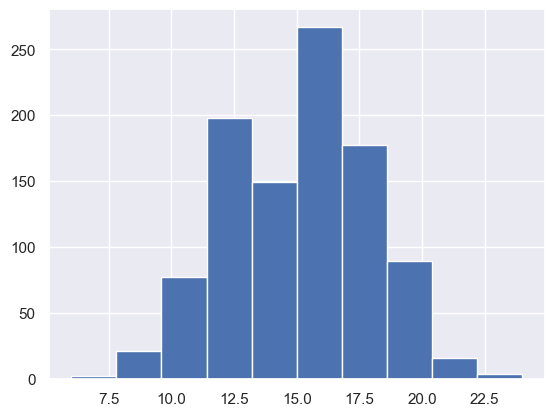

In [63]:
np.random.seed(0)
x = np.random.binomial(
    30, 0.5, 1000
)  # 30回の試行のうち、確率0.5で生じる事象が発生する回数 (1000: サンプル数)
plt.hist(x)
plt.grid(True)

### ポアソン分布

稀な事象が起こる確率分布。一定の時間や面積に対して一定の割合で発生する分布。 e.g. 単位面積あたりの雨粒の数


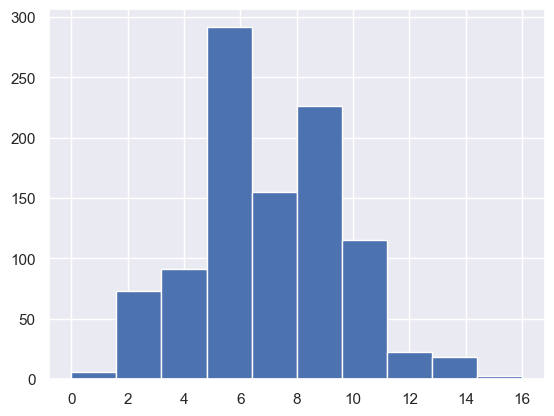

In [64]:
np.random.seed(0)
x = np.random.poisson(
    7, 1000
)  # 平均発生率λ=7: ある書店で1時間あたりに来店する客の平均数が7人, 1000: サンプル数
plt.hist(x)  # 各時間に何人の客がいるのかの分布を表示している
plt.grid(True)

### 正規分布（ガウス分布）・対数正規分布

正規分布は、平均値を中心に左右対称の釣鐘型の分布（logx が正規分布に従う時、x は対数正規分布に従う）。  
生活の身近なところでも、いろいろな現象が正規分布に従うことが多い。代表的な連続型の確率分布。


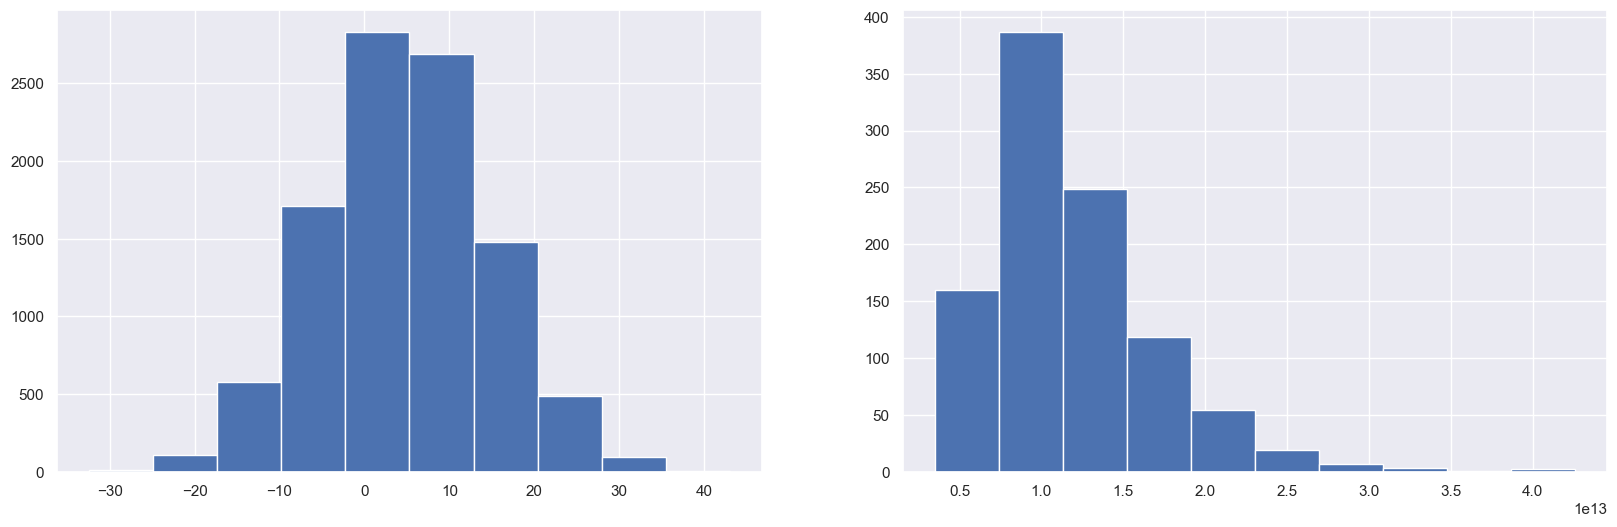

In [74]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
np.random.seed(0)
x = np.random.normal(5, 10, 10000)  # mean, std, sample
plt.hist(x)
plt.grid(True)

plt.subplot(1, 2, 2)
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

## カーネル密度関数

与えられたデータを使って、密度関数を推定する。


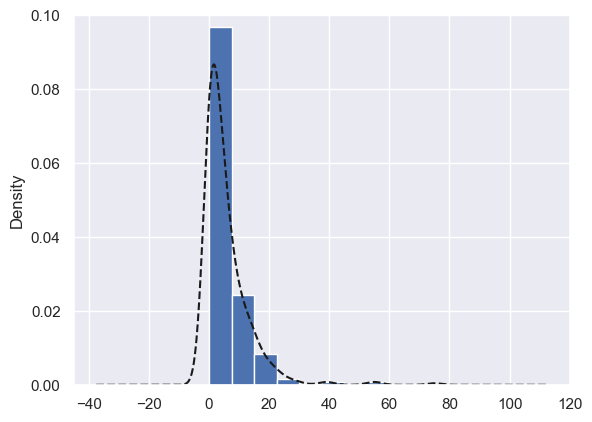

In [83]:
# 欠席数のデータについて、分布の近似をする (データの性質上、0未満は有りえないので注意)
import pandas as pd

student_data_math = pd.read_csv("ch03/student-mat.csv", sep=";")
student_data_math.absences.plot(
    kind="kde", style="k--"
)  # 点線から、ヒストグラムのデータがどんな分布から生成されたのか推測ができる
student_data_math.absences.hist(density=True)
plt.ylim(top=0.1)
plt.plot(True)

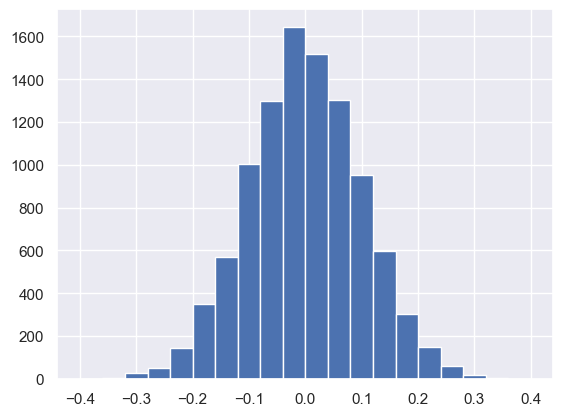

In [101]:
# p108
sample_means = [np.random.normal(0, 1, 100).mean() for _ in range(10000)]
plt.hist(sample_means, bins=20, range=(-0.4, 0.4))
plt.grid(True)

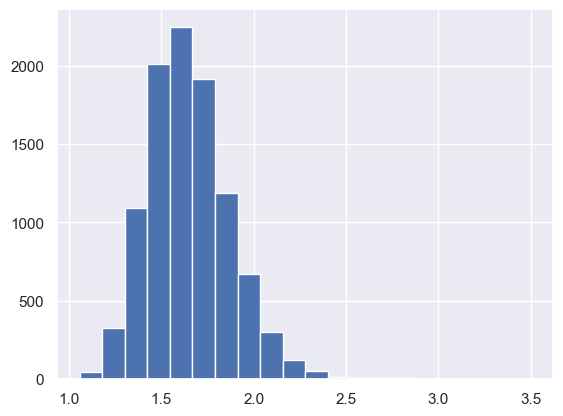

In [95]:
sample_means = [np.random.lognormal(0, 1, 100).mean() for _ in range(10000)]
plt.hist(sample_means, bins=20)
plt.grid(True)

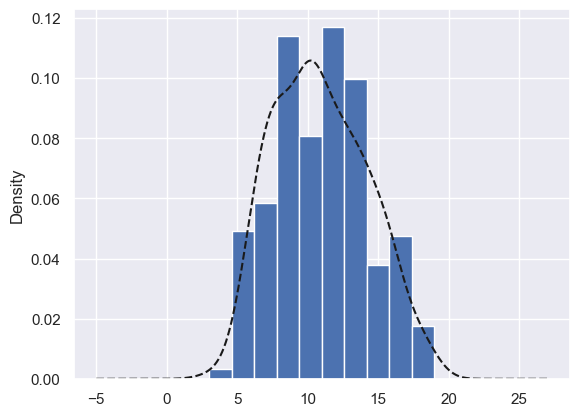

In [98]:
student_data_math.G1.plot(kind="kde", style="k--")
student_data_math.G1.hist(density=True)
plt.grid(True)

# 応用: 多次元確率分布

これまでと違い、確率変数が 2 つ以上ある場合の確率分布。


- **同時確率関数**: P(X=x<sub>i</sub>, Y=y<sub>j</sub>) = p<sub>X,Y</sub>(x<sub>i</sub>, y<sub>j</sub>)

  - **周辺確率関数**: p<sub>X</sub>(x<sub>i</sub>) = Σ<sub>j</sub> p<sub>X,Y</sub>(x<sub>i</sub>, y<sub>j</sub>)


- **条件付き確率関数**: p<sub>Y|X</sub>(y<sub>j</sub>|x<sub>i</sub>) = p<sub>X,Y</sub>(x<sub>i</sub>, y<sub>j</sub>) / p<sub>X</sub>(x<sub>i</sub>)

  - **条件付き期待値** (条件付き確率関数に関して期待値をとったもの): E[Y|X=x<sub>i</sub>] = Σ<sub>j</sub> y<sub>j</sub> \* p<sub>Y|X</sub>(y<sub>j</sub>|x<sub>i</sub>)


- **独立**: p<sub>X,Y</sub>(x<sub>i</sub>, y<sub>j</sub>) = p<sub>X</sub>(x<sub>i</sub>) \* p<sub>Y</sub>(y<sub>j</sub>)


他にも連続分布の場合や、多変数の場合などもある。cf. 分散共分散行列


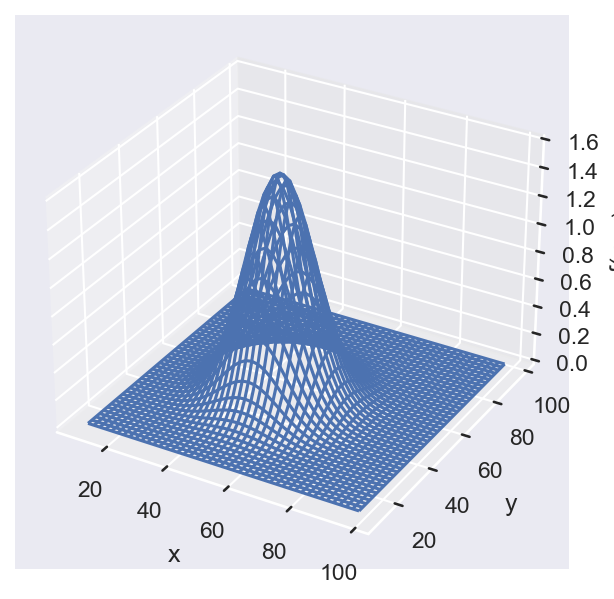

In [136]:
# 2次元の正規分布
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# np.mgridで生成された格子点データの次元を並び替えて、格子点[xi, yi]の集まりに直す
x, y = np.mgrid[10:100:2, 10:100:2]  # (2, 45, 45)
pos = np.empty(x.shape + (2,))  # x.shape: (45, 45) => pos.shape: (45, 45, 2)
pos[:, :, 0] = x
pos[:, :, 1] = y

rv = sp.stats.multivariate_normal(
    [50, 50], [[100, 0], [0, 100]]
)  # 2次元正規分布を定義 ([mu_x, mu_y], 共分散行列)
z = rv.pdf(pos)  # 格子点ごとにz軸の高さ(PDFの値)を計算, z.shape: (45, 45)

fig = plt.figure(dpi=150)  # dpi=150のfigオブジェクトを作成
ax = fig.add_subplot(
    111, projection="3d"
)  # figオブジェクトに3D投影のsubplotを追加, 1行1列の1番目 (つまり全体)
ax.plot_wireframe(x, y, z)  # ワイヤーフレーム形式で描画

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.ticklabel_format(
    style="sci", axis="z", scilimits=(0, 0)
)  # z軸の数値を指数表記に、全ての数値を指数表記に

# 推計統計学

**推計統計学**: 標本から母集団の性質を推測する

- **標本**は**母集団**から**抽出**されたデータ
- 観測されたデータ x<sub>1</sub>, ..., x<sub>n</sub> は、n 個の確率変数 X<sub>1</sub>, ..., X<sub>n</sub> の実現値であり、この n を標本の**サイズ**という
- **母数**: e.g. 母平均、母分散


### 大数の法則

「母平均が μ（ミュー）である集団から標本を抽出する場合、サンプルサイズ（＝標本の大きさ）が大きくなるにつれて、標本平均は母平均 μ に近づく」

大数の法則を元にすると、母集団から抽出された標本から母平均を推測する場合には、サンプルサイズが大きくなるほどより正確に母平均を推測できるということが分かる。


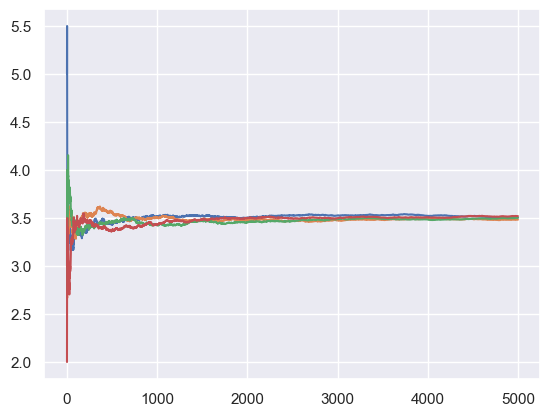

In [140]:
# サイコロを振る回数を増やすと、出目の平均が 期待値 3.5 に近づく。
np.random.seed(0)
paths = 4
times = 5000
dice = np.arange(1, 7)

for _ in range(paths):
    rolls = np.random.choice(dice, times)
    results = rolls.cumsum() / np.arange(1, times + 1)
    plt.plot(results)
    plt.grid(True)

### 中心極限定理

「平均 µ、分散 σ<sup>2</sup>に従う母集団からサンプルサイズ n の標本を抽出する場合、そのサンプルサイズ n が大きくなるにつれて、標本平均の分布は正規分布 N(µ, σ<sup>2</sup>/n)に近づく」

これは、サンプルサイズ n が大きいほどその標本平均のばらつきが小さくなり、標本平均が母平均のより近くに集まる（平均値をより正確に推測できる）ことを表している。


In [141]:
# サイコロを投げる回数 n が増えれば増えるほど、その平均値の分布は正規分布に近づく。
def central_theory(n):
    np.random.seed(0)
    dice = np.arange(1, 7)

    results = np.array([])
    for _ in range(1000):
        rolls = np.random.choice(dice, n)
        results = np.append(results, rolls.mean())

    plt.hist(results)
    plt.grid(True)

Text(0.5, 1.0, 'n=10**6')

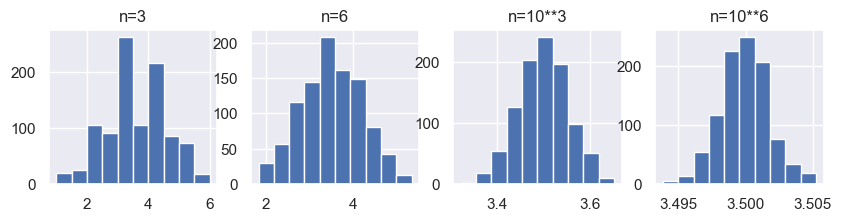

In [153]:
plt.figure(figsize=(10, 2))
plt.subplot(1, 4, 1)
central_theory(3)
plt.title('n=3')
plt.subplot(1, 4, 2)
central_theory(6)
plt.title('n=6')
plt.subplot(1, 4, 3)
central_theory(10**3)
plt.title('n=10**3')
plt.subplot(1, 4, 4)
central_theory(10**6)
plt.title('n=10**6')

## 代表的な標本分布

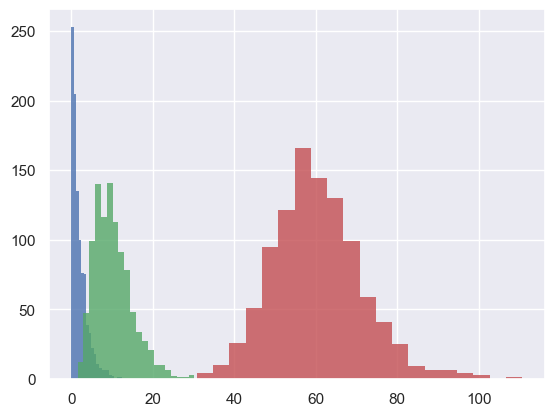

In [184]:
# カイ二乗分布
# df: degrees of freedom (自由度2, 10, 6)
for df, c in zip([2, 10, 60], "bgr"):
    x = np.random.chisquare(
        df, 1000
    )  # 自由度dfのカイ二乗分布から1000個のサンプルを生成
    plt.hist(x, bins=20, color=c, alpha=0.8, edgecolor='none')
    plt.grid(True)

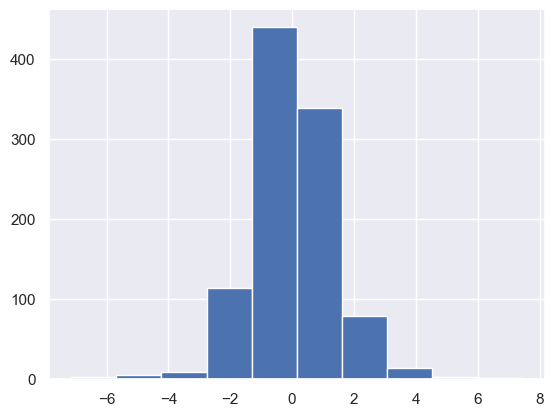

In [159]:
# ステューデントt分布
x = np.random.standard_t(df=5, size=1000)
plt.hist(x)
plt.grid(True)

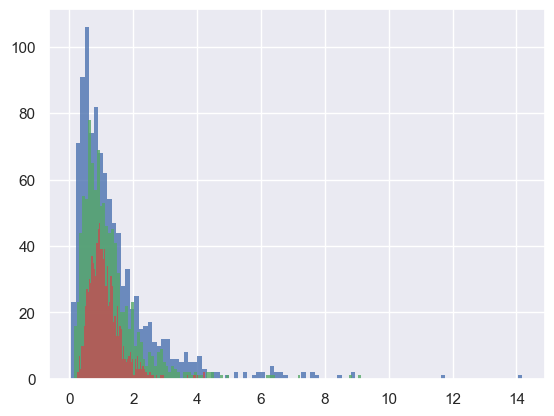

In [183]:
# F分布
for df, c in zip([(6, 7), (10, 10), (20, 25)], "bgr"):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, bins=100, color=c, alpha=0.8, edgecolor="none")
    plt.grid(True)

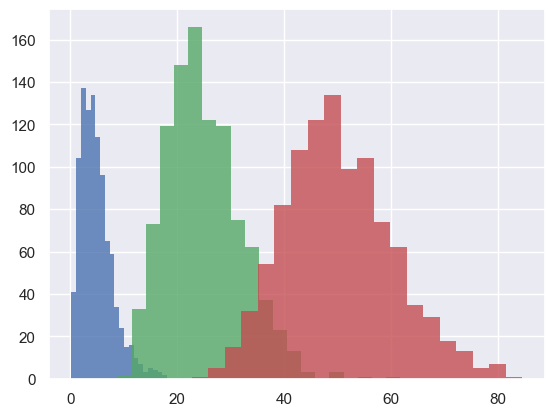

In [186]:
# p116
np.random.seed(0)
for df, c in zip([5, 25, 50], "bgr"):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, bins=20, color=c, alpha=0.8, edgecolor="none")
    plt.grid(True)

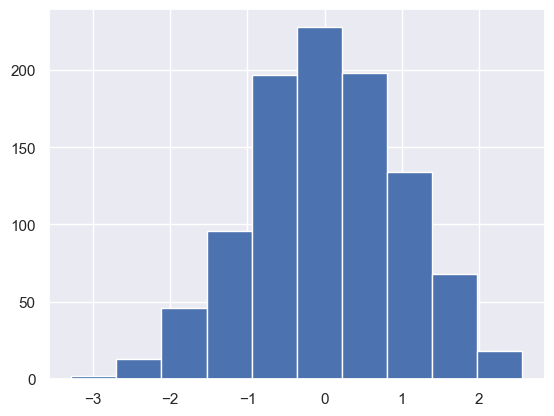

In [187]:
np.random.seed(0)
x = np.random.standard_t(df=100, size=1000)
plt.hist(x)
plt.grid(True)

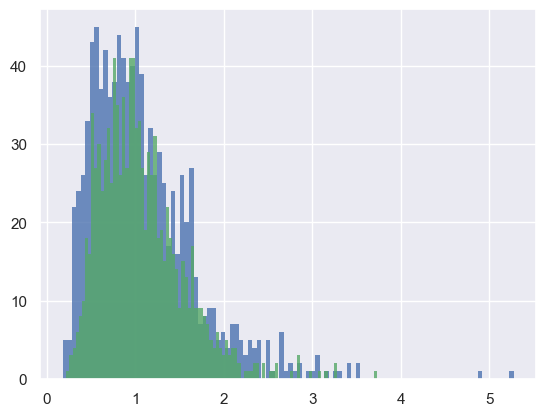

In [191]:
np.random.seed(0)
for df, c in zip([(10, 30), (20, 25)], "bg"):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, bins=100, color=c, alpha=0.8, edgecolor="none")
    plt.grid(True)

# 推定

# 検定